# **Data Pre-processing**

In [30]:
# Random Seed for Under-sampling, Data-split and Modeling
a = 42
b = 42
c = 42

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [3]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [4]:
data_backup = data
data_backup

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [5]:
data.columns.tolist()

['Unnamed: 0',
 'Use Case',
 'LTE/5g Category',
 'Technology Supported',
 'Day',
 'Time',
 'GBR',
 'Packet Loss Rate',
 'Packet delay',
 'slice Type']

In [6]:
data['LTE/5g Category'].value_counts()

,count
LTE/5g Category,
12,3024
11,3024
18,3024
17,3024
16,3024
15,3024
14,3024
13,3024
2,3024


In [7]:
data['Technology Supported'].value_counts()

,count
Technology Supported,
LTE/5G,33599
"IoT(LTE-M, NB-IoT)",29568


In [8]:
data = data.drop(data.columns[0], axis=1)
data

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...
63162,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [9]:
data = data.drop(['LTE/5g Category','Day','Time'], axis=1)
data

,Use Case,Technology Supported,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
1,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
2,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
3,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
4,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...
63162,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC


### **Data Distribution by "Use Case"**

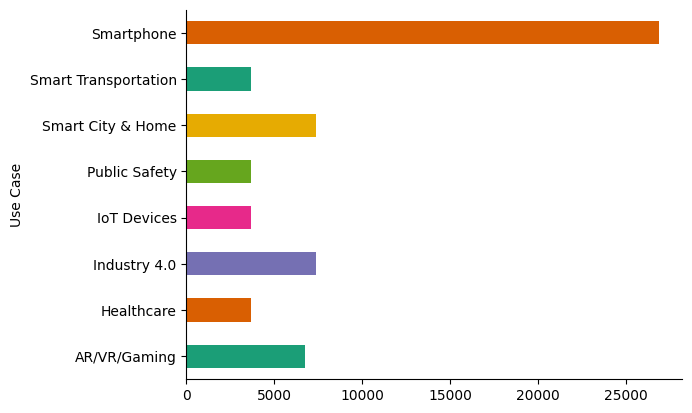

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Conversion of Feature Columns (Categorial to Numerical)**

using one-hot encoding

In [11]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Use Case', 'Technology Supported', 'GBR'])
one_hot_encoded_data

,Packet Loss Rate,Packet delay,slice Type,Use Case_AR/VR/Gaming,Use Case_Healthcare,Use Case_Industry 4.0,Use Case_IoT Devices,Use Case_Public Safety,Use Case_Smart City & Home,Use Case_Smart Transportation,Use Case_Smartphone,"Technology Supported_IoT(LTE-M, NB-IoT)",Technology Supported_LTE/5G,GBR_GBR,GBR_Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [12]:
data_ohe = one_hot_encoded_data.rename(columns={'Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data_ohe

,Packet Loss Rate,Packet delay,slice Type,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [13]:
data = data_ohe[['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]
data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
1,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
2,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
3,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
4,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63163,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63164,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63165,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC


In [14]:
# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ["IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data[column] = data[column].replace({False: 0, True: 1})

data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC


### **Class Distribution Analysis**

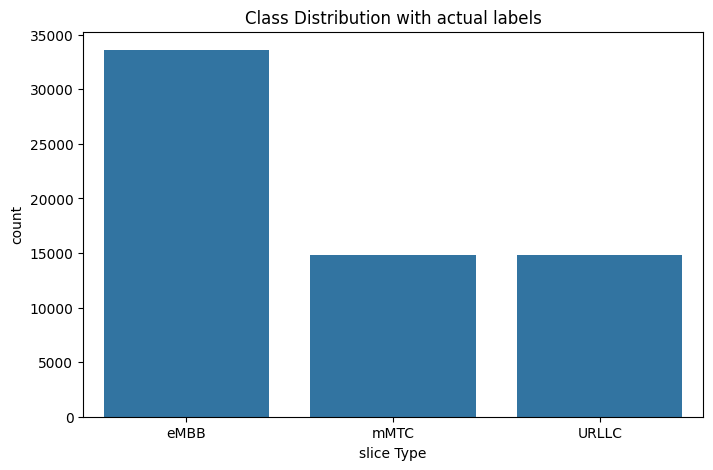

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

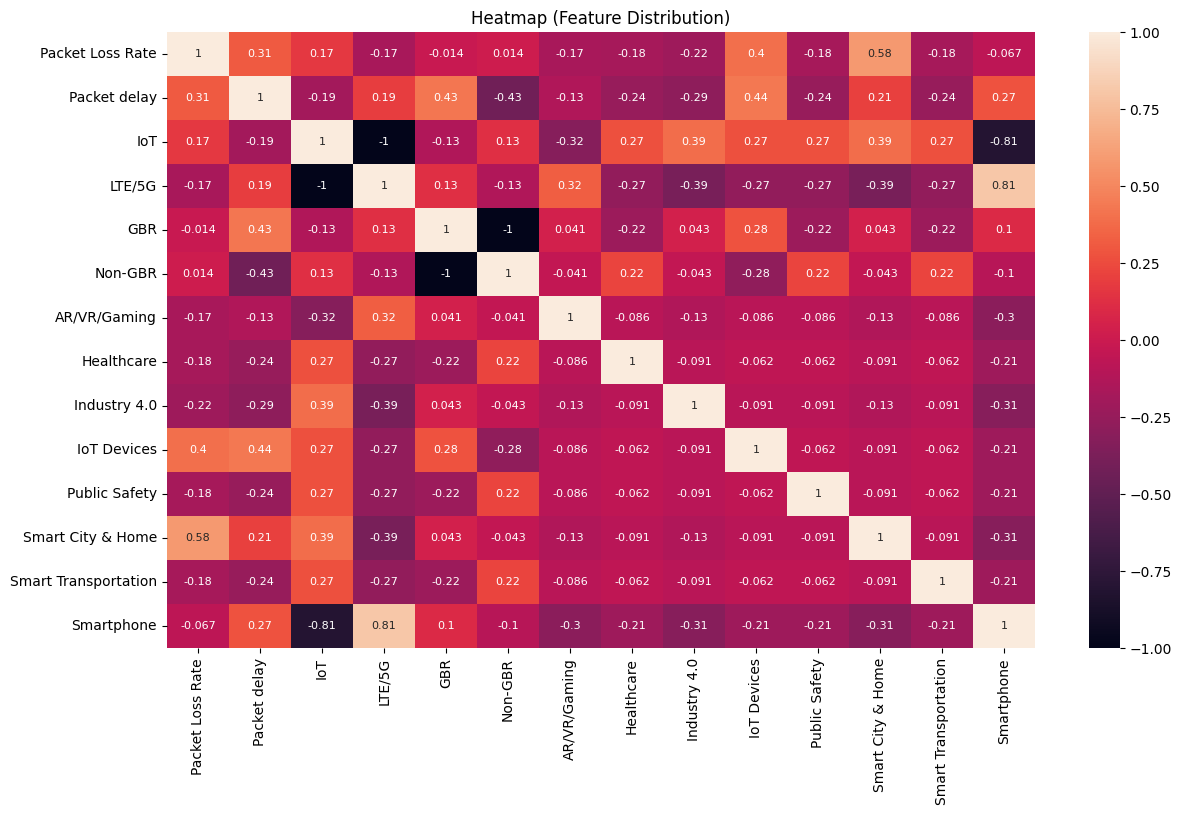

In [16]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

#### **Under Sampling - Class Imbalance Issue**

In [ ]:
print(a)

42


In [ ]:
# # Identify the majority class
# majority_class = data['slice Type'].value_counts().idxmax()
# print("Majority Class: ", majority_class)

# # Count the number of data points in the majority class
# majority_count = data['slice Type'].value_counts()[majority_class]
# print("Majority Class Count: ", majority_count)

# # Count the number of data points in the other two classes
# minority_count = data['slice Type'].value_counts().min()
# print("Minority Class Count: ", minority_count)

# # Calculate the number of data points to remove from the majority class
# num_to_remove = majority_count - minority_count
# print("Amount of Data to be removed: ", num_to_remove)

# # Randomly select data points from the majority class to remove
# majority_indices = data[data['slice Type'] == majority_class].index
# np.random.seed(a)
# remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
# print("Indices to be removed: \n", remove_indices[:100])

# # Remove the selected data points from the DataFrame
# balanced_data = data.drop(remove_indices)

Majority Class:  1
Majority Class Count:  16799
Minority Class Count:  7392
Amount of Data to be removed:  9407
Indices to be removed: 
 [ 9283 15411 22506 15968  9548 11147  6029  5649 27278  1353 11397  8841
  1786 15540 10145 18312 14588  7383 27577 14222 30759 14559 16673  6260
 23971 23636 17759 22812 24223 31408  6540 21397 21160 27426 28966  1051
 15931 23797  1704 20177 21486  5190    80  5863  9601  9237 17818  4178
   713 29539  2456 20446  3111 24284  3006 25491 20441 23468 14231 31454
  5892  6818 29344 14937 25005 24834  2118   174 25728 18703 22213 30414
 20778  5882 22776  4907 21878  2475 11174 21289  1333   612 19129 20137
  6871 12822 20667 12997 20801 10405 28737 29848 30676  7318   879  8021
 17483 26389  4659 16951]


In [ ]:
# data = balanced_data
# data.head(20)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
5,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
6,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
9,13,10,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1
10,3,4,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
11,7,17,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3
12,7,3,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [ ]:
# data = data.reset_index(drop=True)
# data.head(20)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
2,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
3,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
4,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
5,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
6,13,10,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1
7,3,4,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
8,7,17,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3
9,7,3,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


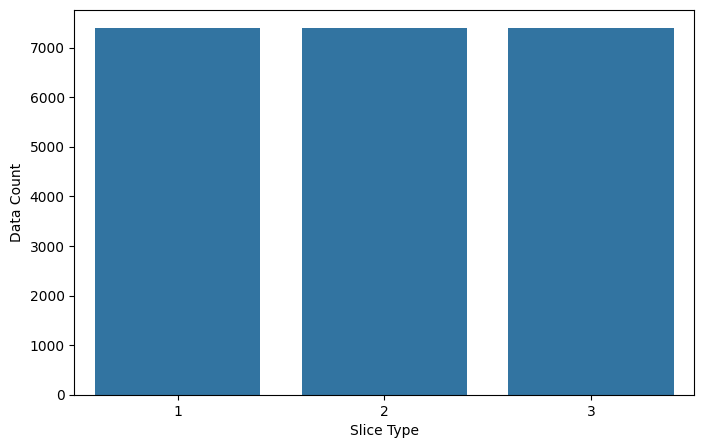

In [ ]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=data['slice Type'])
# # plt.title('Balanced Class Distribution with actual labels')
# plt.xlabel('Slice Type')
# plt.ylabel('Data Count')
# plt.show()

#### Heatmaps

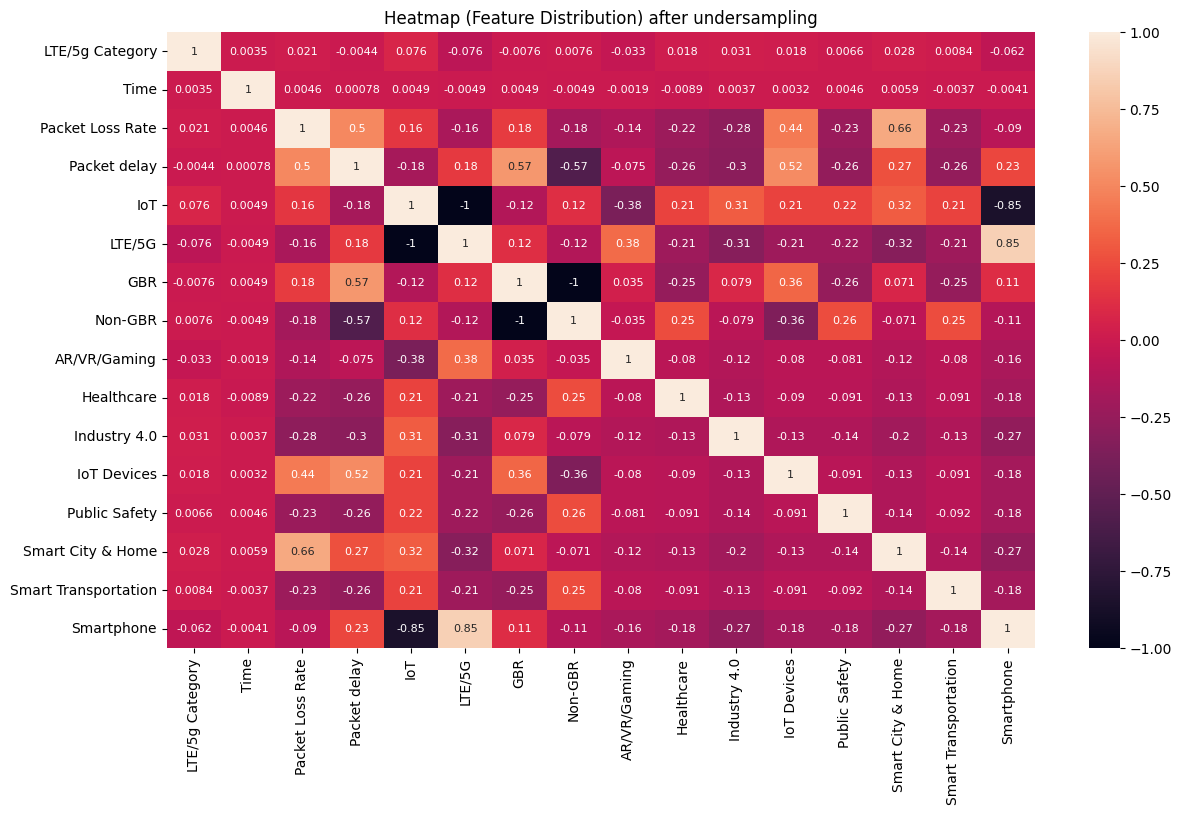

In [ ]:
# # Create a heatmap for the correlation matrix of all features after undersampling
# plt.figure(figsize=(14, 8))
# sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution) after undersampling')
# plt.show()

### **Relevant Feature Selection**

In [17]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

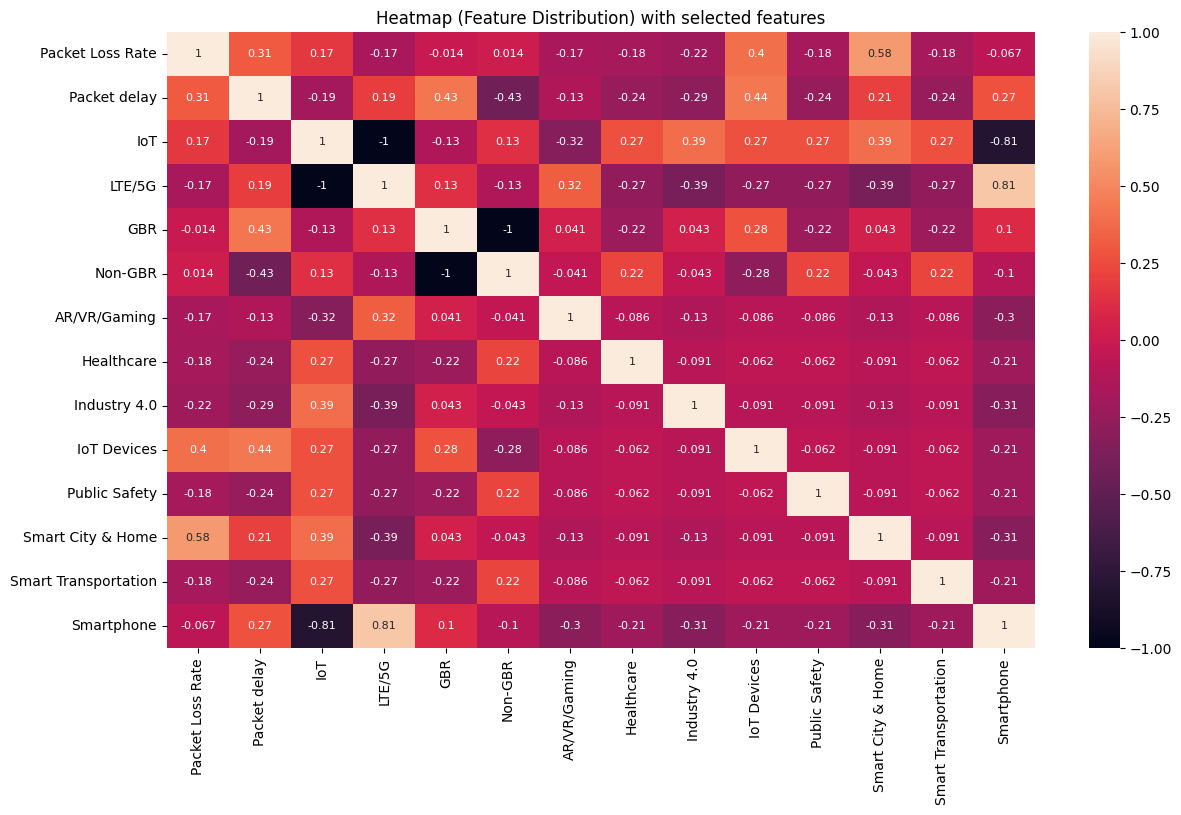

In [18]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

### **Define X and y**

In [19]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0


In [21]:
y = data['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
63162,URLLC
63163,URLLC
63164,URLLC
63165,URLLC


### **Apply t-sne to X**

In [22]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0


In [23]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[   3.8076065,   13.465401 ],
       [   3.8076065,   13.465401 ],
       [   3.8076065,   13.465401 ],
       ...,
       [-133.69272  ,  -13.507328 ],
       [-133.69272  ,  -13.507328 ],
       [-133.69272  ,  -13.507328 ]], dtype=float32)

In [24]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,3.807606,13.465401
1,3.807606,13.465401
2,3.807606,13.465401
3,3.807606,13.465401
4,3.807606,13.465401
...,...,...
63162,-133.692719,-13.507328
63163,-133.692719,-13.507328
63164,-133.692719,-13.507328
63165,-133.692719,-13.507328


#### Pair Plots

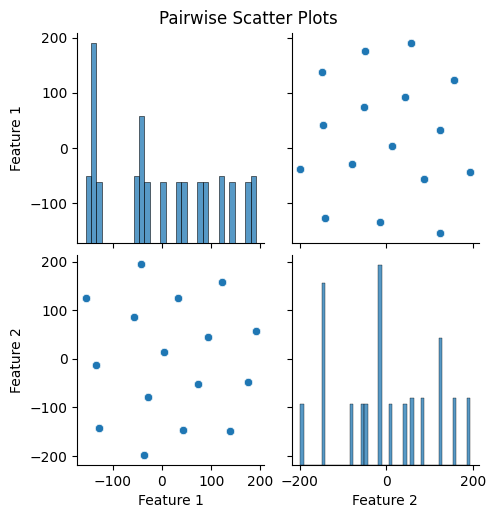

In [25]:
sns.pairplot(X)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [26]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,3.807606,13.465401,eMBB
1,3.807606,13.465401,eMBB
2,3.807606,13.465401,eMBB
3,3.807606,13.465401,eMBB
4,3.807606,13.465401,eMBB
...,...,...,...
63162,-133.692719,-13.507328,URLLC
63163,-133.692719,-13.507328,URLLC
63164,-133.692719,-13.507328,URLLC
63165,-133.692719,-13.507328,URLLC


In [27]:
features = ['Feature 1', 'Feature 2']

### **Define Unlabelled and Labelled Dataset**

In [31]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=0.1, random_state=b)

In [32]:
X_labelled

,Feature 1,Feature 2
44594,-55.675285,86.218414
4996,41.988632,-146.180542
50490,-133.692719,-13.507328
3262,3.807606,13.465401
51739,-133.692719,-13.507328
...,...,...
62570,-133.692719,-13.507328
38158,-154.290497,124.514435
860,3.807606,13.465401
15795,175.127579,-48.715855


In [33]:
X_unlabelled

,Feature 1,Feature 2
27189,-126.577858,-142.140823
54980,122.777832,156.862976
22142,-37.030659,-198.224091
28289,-126.577858,-142.140823
61715,-133.692719,-13.507328
...,...,...
30453,32.833435,124.894821
57662,-42.673599,194.125198
30257,32.833435,124.894821
35595,190.713745,56.470364


### **Ground Truth Calculation**

In [34]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Feature 1', 'Feature 2']

In [35]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
data_labelled = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
data_labelled.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
data_labelled['slice Type'] = y_labelled

data_labelled

,Feature 1,Feature 2,slice Type
0,-55.675285,86.218414,mMTC
1,41.988632,-146.180542,eMBB
2,-133.692719,-13.507328,URLLC
3,3.807606,13.465401,eMBB
4,-133.692719,-13.507328,URLLC
...,...,...,...
6311,-133.692719,-13.507328,URLLC
6312,-154.290497,124.514435,URLLC
6313,3.807606,13.465401,eMBB
6314,175.127579,-48.715855,eMBB


#### **Ground Truth Slice 1**

In [36]:
# Group data by label "slice 1"
grouped_data_slice1 = data_labelled[data_labelled['slice Type'] == 'eMBB']
grouped_data_slice1

,Feature 1,Feature 2,slice Type
1,41.988632,-146.180542,eMBB
3,3.807606,13.465401,eMBB
5,93.037384,43.869308,eMBB
7,41.988632,-146.180542,eMBB
8,32.833435,124.894821,eMBB
...,...,...,...
6305,-28.103575,-78.501190,eMBB
6306,41.988632,-146.180542,eMBB
6308,74.069206,-52.263367,eMBB
6313,3.807606,13.465401,eMBB


In [37]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[  41.988632 , -146.18054  ],
       [   3.8076065,   13.465401 ],
       [  93.037384 ,   43.86931  ],
       ...,
       [  74.06921  ,  -52.263367 ],
       [   3.8076065,   13.465401 ],
       [ 175.12758  ,  -48.715855 ]], dtype=float32)

In [38]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([ 34.70406 , -67.166725], dtype=float32)

#### **Ground Truth Slice 2**

In [39]:
# Group data by label "slice 2"
grouped_data_slice2 = data_labelled[data_labelled['slice Type'] == 'mMTC']
grouped_data_slice2

,Feature 1,Feature 2,slice Type
0,-55.675285,86.218414,mMTC
15,-42.673599,194.125198,mMTC
16,190.713745,56.470364,mMTC
18,-42.673599,194.125198,mMTC
29,-42.673599,194.125198,mMTC
...,...,...,...
6299,-55.675285,86.218414,mMTC
6303,190.713745,56.470364,mMTC
6307,122.777832,156.862976,mMTC
6310,122.777832,156.862976,mMTC


In [40]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[-55.675285,  86.218414],
       [-42.6736  , 194.1252  ],
       [190.71375 ,  56.470364],
       ...,
       [122.77783 , 156.86298 ],
       [122.77783 , 156.86298 ],
       [-42.6736  , 194.1252  ]], dtype=float32)

In [41]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([ 55.943344, 123.7955  ], dtype=float32)

#### **Ground Truth Slice 3**

In [42]:
# Group data by label "slice 3"
grouped_data_slice3 = data_labelled[data_labelled['slice Type'] == 'URLLC']
grouped_data_slice3

,Feature 1,Feature 2,slice Type
2,-133.692719,-13.507328,URLLC
4,-133.692719,-13.507328,URLLC
6,-133.692719,-13.507328,URLLC
12,-133.692719,-13.507328,URLLC
13,-154.290497,124.514435,URLLC
...,...,...,...
6301,-133.692719,-13.507328,URLLC
6304,-133.692719,-13.507328,URLLC
6309,-133.692719,-13.507328,URLLC
6311,-133.692719,-13.507328,URLLC


In [43]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-133.69272 ,  -13.507328],
       [-133.69272 ,  -13.507328],
       [-133.69272 ,  -13.507328],
       ...,
       [-133.69272 ,  -13.507328],
       [-133.69272 ,  -13.507328],
       [-154.2905  ,  124.514435]], dtype=float32)

In [44]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([-138.72649 ,   20.222975], dtype=float32)

#### **Plot Ground Truth**

In [45]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[  34.70406 ,  -67.166725],
       [  55.943344,  123.7955  ],
       [-138.72649 ,   20.222975]], dtype=float32)

In [ ]:
# # Testing the for loop
# for cluster in range(1, len(np.unique(data['slice Type']))+1):
#     cluster_data = data[data['slice Type'] == cluster]
#     print(cluster, "\n",cluster_data, "\n")

In [46]:
data_labelled['slice Type']

,slice Type
0,mMTC
1,eMBB
2,URLLC
3,eMBB
4,URLLC
...,...
6311,URLLC
6312,URLLC
6313,eMBB
6314,eMBB


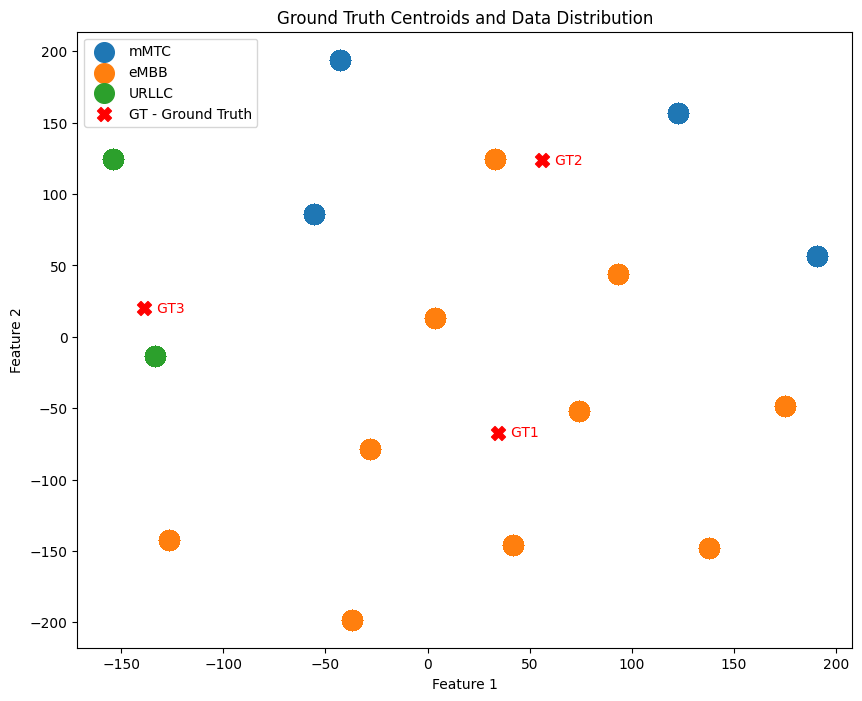

In [47]:
# Plot the scatter plot with different colors for each class
plt.figure(figsize=(10, 8))

slice_types = data_labelled['slice Type'].unique();
for slice_type in slice_types:
    cluster_data = data_labelled[data_labelled['slice Type'] == slice_type]
    plt.scatter(cluster_data[data_labelled.columns[0]], cluster_data[data_labelled.columns[1]], s=200, label=slice_type)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

plt.xlabel(data_labelled.columns[0])
plt.ylabel(data_labelled.columns[1])
plt.title('Ground Truth Centroids and Data Distribution')
plt.legend()
# plt.xlim(-200, 200)  # Set your desired x-axis range
# plt.ylim(-200, 200)  # Set your desired y-axis range
plt.show()

### **Datasplit - X, X_train and X_test**

In [48]:
print(b)

42


In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_unlabelled,y_unlabelled, test_size=0.1, random_state=b)
X_train

,Feature 1,Feature 2
19322,-28.103575,-78.501190
13879,175.127579,-48.715855
57610,-42.673599,194.125198
62777,-133.692719,-13.507328
48558,-133.692719,-13.507328
...,...,...
45421,-133.692719,-13.507328
50890,-133.692719,-13.507328
6108,41.988632,-146.180542
47550,-133.692719,-13.507328


In [50]:
X_test

,Feature 1,Feature 2
8763,93.037384,43.869308
3698,41.988632,-146.180542
43970,-55.675285,86.218414
30996,32.833435,124.894821
38376,-154.290497,124.514435
...,...,...
51751,-133.692719,-13.507328
52076,-133.692719,-13.507328
38637,-154.290497,124.514435
37066,190.713745,56.470364


In [51]:
y_train

,slice Type
19322,eMBB
13879,eMBB
57610,mMTC
62777,URLLC
48558,URLLC
...,...
45421,URLLC
50890,URLLC
6108,eMBB
47550,URLLC


In [52]:
y_test

,slice Type
8763,eMBB
3698,eMBB
43970,mMTC
30996,eMBB
38376,URLLC
...,...
51751,URLLC
52076,URLLC
38637,URLLC
37066,mMTC


# **Data Modelling and Analysis**

## **Model Training**

In [53]:
print(c)

42


In [54]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=c)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [55]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([2, 1, 0, ..., 2, 0, 2], dtype=int32)

In [56]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([3, 2, 1, ..., 3, 1, 3], dtype=int32)

In [57]:
len(kmeans_model_labels_aligned)

51165

In [58]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

In [59]:
# Mapping dictionary
label_mapping = {1: 'eMBB', 2: 'mMTC', 3: 'URLLC'}

# Vectorize the mapping function
replace_labels = np.vectorize(label_mapping.get)

# Replace labels
kmeans_model_labels_aligned_replaced = replace_labels(kmeans_model_labels_aligned)
kmeans_model_labels_aligned_replaced

array(['URLLC', 'mMTC', 'eMBB', ..., 'URLLC', 'eMBB', 'URLLC'],
      dtype='<U5')

In [60]:
np.unique(kmeans_model_labels_aligned_replaced)

array(['URLLC', 'eMBB', 'mMTC'], dtype='<U5')

## **Model Centroids**

In [61]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[ -94.11393 ,   54.874706],
       [ 124.29032 ,   68.106125],
       [  10.001083, -127.49945 ]], dtype=float32)

In [62]:
C1 = kmeans_model_centroids[0]
C1

array([-94.11393 ,  54.874706], dtype=float32)

In [63]:
C2 = kmeans_model_centroids[1]
C2

array([124.29032 ,  68.106125], dtype=float32)

In [64]:
C3 = kmeans_model_centroids[2]
C3

array([  10.001083, -127.49945 ], dtype=float32)

## **Initialization of an empty array before Centroid Mapping based on Ground Truths**

In [65]:
feature_lists = [features, features, features]
feature_lists

[['Feature 1', 'Feature 2'],
 ['Feature 1', 'Feature 2'],
 ['Feature 1', 'Feature 2']]

In [66]:
len(features)

2

In [67]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

2

In [113]:
# arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
# arr
# arr.dtype

In [68]:
# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns))
print(arr)
print(arr.dtype)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
float64


#### **Plot Model Centroids**

In [69]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_cluster_labels = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame
X_train_with_cluster_labels['cluster_label'] = kmeans_model_labels_aligned_replaced
X_train_with_cluster_labels

,Feature 1,Feature 2,cluster_label
19322,-28.103575,-78.501190,URLLC
13879,175.127579,-48.715855,mMTC
57610,-42.673599,194.125198,eMBB
62777,-133.692719,-13.507328,eMBB
48558,-133.692719,-13.507328,eMBB
...,...,...,...
45421,-133.692719,-13.507328,eMBB
50890,-133.692719,-13.507328,eMBB
6108,41.988632,-146.180542,URLLC
47550,-133.692719,-13.507328,eMBB


In [70]:
y_train

,slice Type
19322,eMBB
13879,eMBB
57610,mMTC
62777,URLLC
48558,URLLC
...,...
45421,URLLC
50890,URLLC
6108,eMBB
47550,URLLC


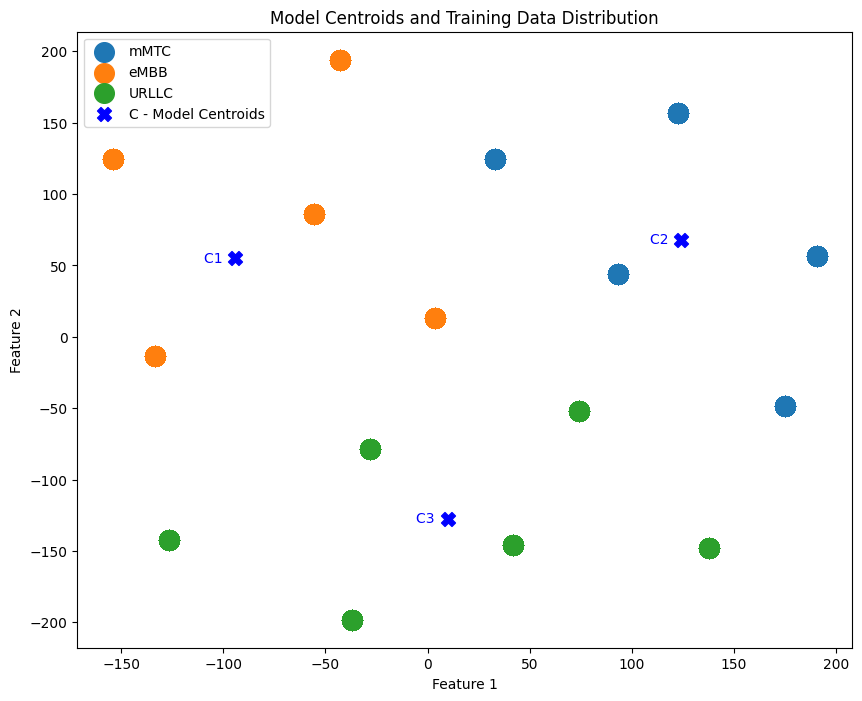

In [71]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
# comeback to fix data
slice_types = data_labelled['slice Type'].unique();
for slice_type in slice_types:
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == slice_type]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=slice_type)

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Model Centroids and Training Data Distribution')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

## **Minimum Distance of C1 from Ground Truths**

In [72]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

177.44911

In [73]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

165.12802

In [74]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

56.48914

In [75]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "eMBB"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "mMTC"
    arr[0] = C2
else:
    closest_centroid_C1 = "URLLC"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  56.48914 from the Model's Centroid/Cluster URLLC


array([[  10.00108337, -127.49945068],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ]])

## **Minimum Distance of C2 from Ground Truths**

In [76]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

162.2481

In [77]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

88.16244

In [78]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

267.33994

In [79]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "eMBB"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "mMTC"
    arr[1] = C2
else:
    closest_centroid_C2 = "URLLC"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  88.16244 from the Model's Centroid/Cluster mMTC


array([[  10.00108337, -127.49945068],
       [ 124.29032135,   68.10612488],
       [   0.        ,    0.        ]])

## **Minimum Distance of C3 from Ground Truths**

In [80]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

65.19413

In [81]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

255.46007

In [82]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

209.623

In [83]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "eMBB"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "mMTC"
    arr[2] = C2
else:
    closest_centroid_C3 = "URLLC"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  65.19413 from the Model's Centroid/Cluster eMBB


array([[  10.00108337, -127.49945068],
       [ 124.29032135,   68.10612488],
       [ -94.11392975,   54.87470627]])

## **Model Centroids Mapping to Labels**

In [84]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  56.48914 from the Model's Centroid/Cluster URLLC
C2 has minimum distance of  88.16244 from the Model's Centroid/Cluster mMTC
C3 has minimum distance of  65.19413 from the Model's Centroid/Cluster eMBB


### **Before Mapping the Labels**

In [85]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [86]:
kmeans_model_centroids

array([[ -94.11393 ,   54.874706],
       [ 124.29032 ,   68.106125],
       [  10.001083, -127.49945 ]], dtype=float32)

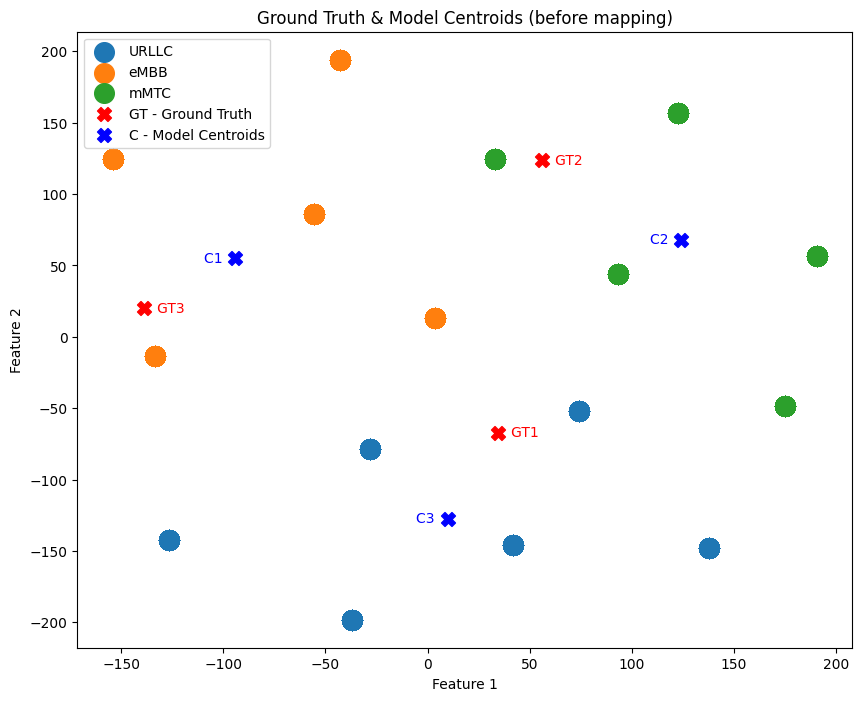

In [87]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))

# for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
slice_types = np.unique(data_labelled['slice Type']);
for slice_type in slice_types:
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == slice_type]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=slice_type)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (before mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

### **After Mapping the Labels**

In [88]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [89]:
kmeans_model_mod.cluster_centers_ = arr

In [90]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[  10.00108337, -127.49945068],
       [ 124.29032135,   68.10612488],
       [ -94.11392975,   54.87470627]])

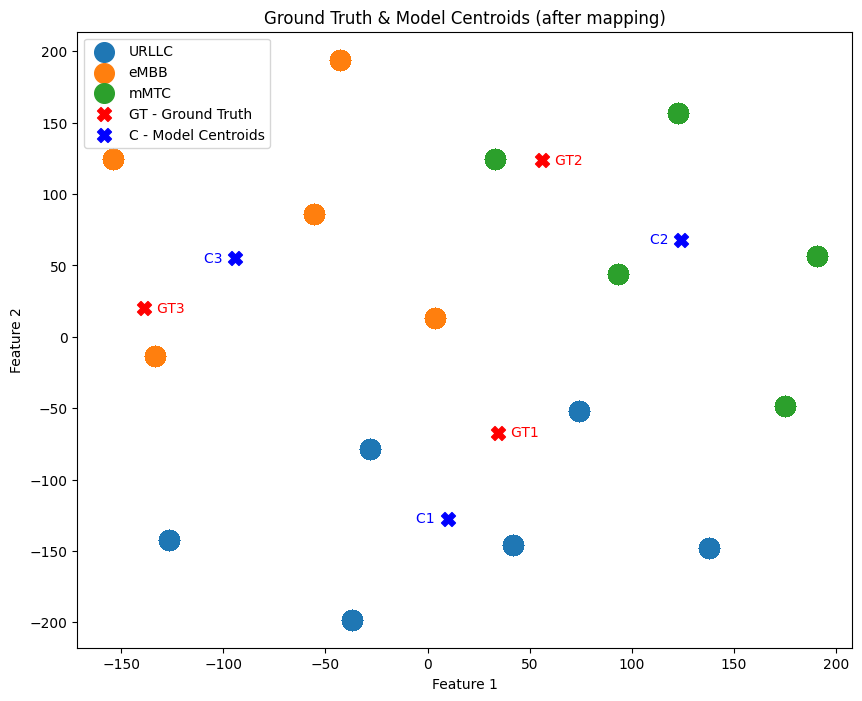

In [91]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))

# for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
slice_types = np.unique(data_labelled['slice Type']);
for slice_type in slice_types:
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == slice_type]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=slice_type)

# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_train_with_cluster_labels['cluster_label'], data=X_train_with_cluster_labels, palette='Set1', s=200)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (after mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

# **Model Testing**

In [105]:
# Convert X_test to float32
X_test = X_test.astype(np.float64)
X_test

,Feature 1,Feature 2
8763,93.037384,43.869308
3698,41.988632,-146.180542
43970,-55.675285,86.218414
30996,32.833435,124.894821
38376,-154.290497,124.514435
...,...,...
51751,-133.692719,-13.507328
52076,-133.692719,-13.507328
38637,-154.290497,124.514435
37066,190.713745,56.470364


In [106]:
X_test.dtypes

,0
Feature 1,float64
Feature 2,float64


In [107]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([1, 0, 2, ..., 2, 1, 0], dtype=int32)

In [108]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([2, 1, 3, ..., 3, 2, 1], dtype=int32)

In [109]:
len(y_pred_aligned)

5686

In [110]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

In [111]:
# Mapping dictionary
label_mapping = {1: 'eMBB', 2: 'mMTC', 3: 'URLLC'}

# Vectorize the mapping function
replace_labels = np.vectorize(label_mapping.get)

# Replace labels
y_pred_aligned_replaced = replace_labels(y_pred_aligned)
y_pred_aligned_replaced

array(['mMTC', 'eMBB', 'URLLC', ..., 'URLLC', 'mMTC', 'eMBB'], dtype='<U5')

## **Update testing dataset with labels**

In [112]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned_replaced, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [113]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature 1,Feature 2,actual_label,predicted_label
0,93.037384,43.869308,eMBB,mMTC
1,41.988632,-146.180542,eMBB,eMBB
2,-55.675285,86.218414,mMTC,URLLC
3,32.833435,124.894821,eMBB,mMTC
4,-154.290497,124.514435,URLLC,URLLC
5,175.127579,-48.715855,eMBB,mMTC
6,-133.692719,-13.507328,URLLC,URLLC
7,-154.290497,124.514435,URLLC,URLLC
8,-37.030659,-198.224091,eMBB,eMBB
9,-133.692719,-13.507328,URLLC,URLLC


## **Predicted Label Analysis**

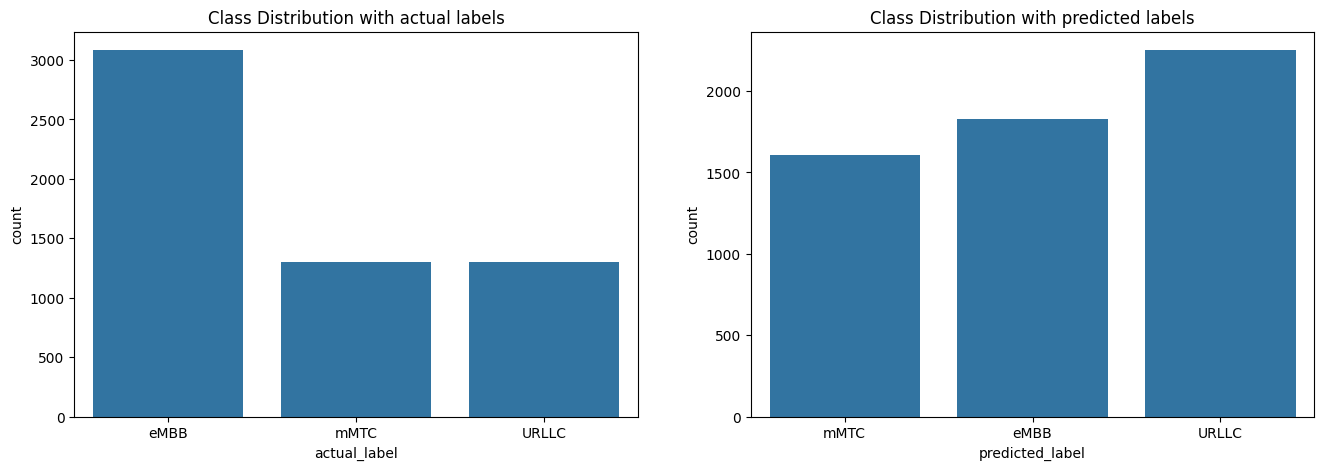

In [114]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [115]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.4462929265727625


In [116]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.8381518984180549


In [117]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 0.33019085593999864


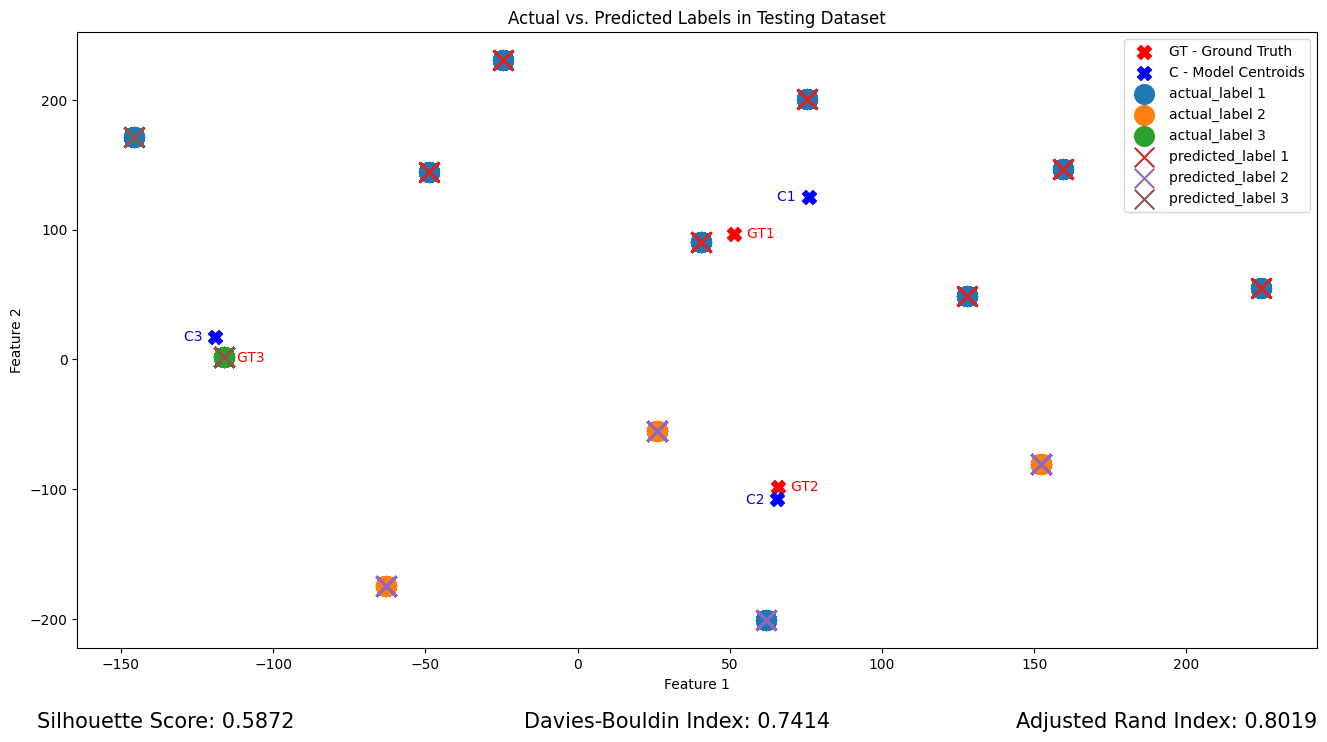

In [ ]:
# Plot the scatter plot with different colors for the testing data
plt.figure(figsize=(16, 8))

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# Plot Actual Labels in Testing Dataset
for cluster in range(1, len(np.unique(y_pred_aligned))+1):
    # cluster_data_test = X_test_with_labels[X_test_with_labels['actual_label'] == cluster]
    cluster_data_test = X_test_with_labels[actual_label == cluster]
    plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], s=200, label=f'actual_label {cluster}')
# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['actual_label'], data=X_test_with_labels, palette='Set1', s=200)

# Plot Predicted Labels in Testing Dataset
for cluster in range(1, len(np.unique(y_pred_aligned))+1):
    # cluster_data_test = X_test_with_labels[X_test_with_labels['predicted_label'] == cluster]
    cluster_data_test = X_test_with_labels[predicted_label == cluster]
    plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], marker='x', s=200, label=f'predicted_label {cluster}')
# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['predicted_label'], data=X_test_with_labels, palette='Set1', s=200, marker='x')

# Adding a footer or note
plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Actual vs. Predicted Labels in Testing Dataset')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

<ipython-input-86-5f4a21af1cb7>:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter2 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')


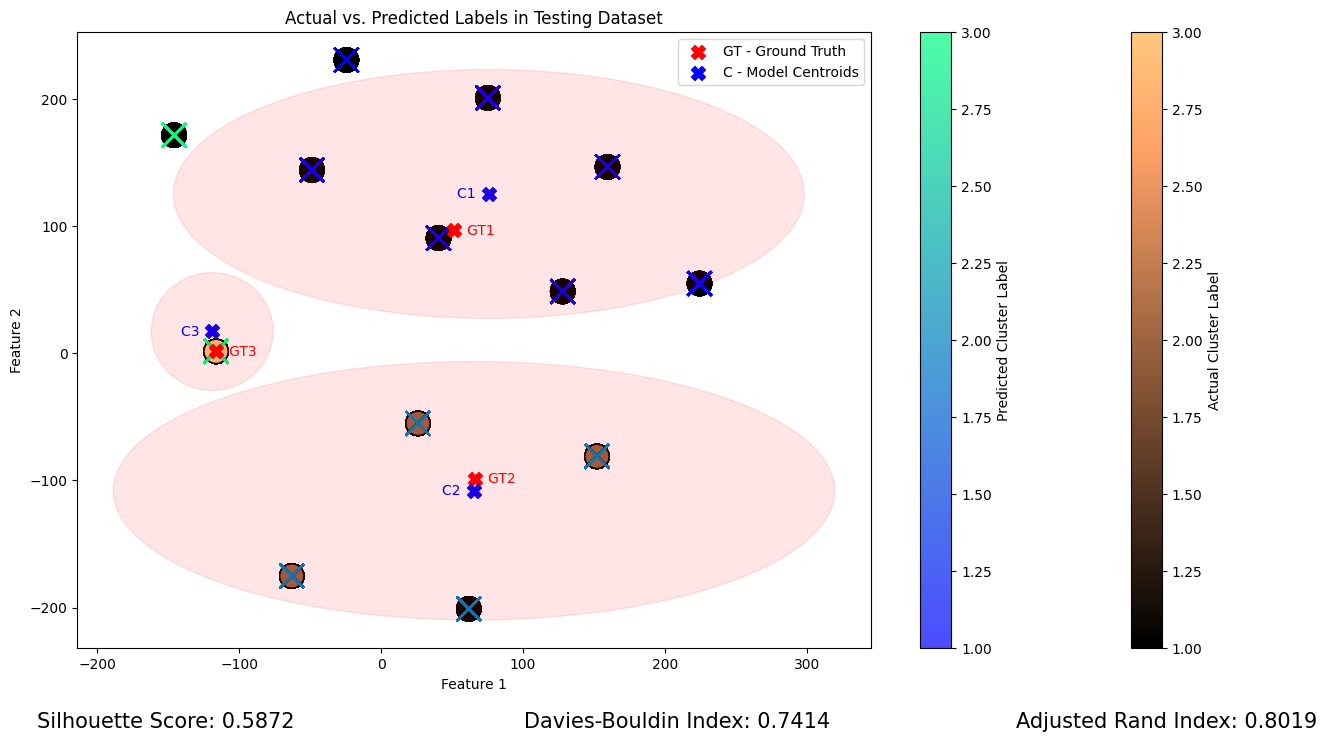

In [ ]:
# Plot the scatter plot with different colors for the testing data
plt.figure(figsize=(16, 8))

# Plot Actual Labels in Testing Dataset
scatter1 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = actual_label, cmap='copper', edgecolors='k', alpha=1.0, s=300, marker='o')
# Plot Predicted Labels in Testing Dataset
scatter2 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')

# Add colorbar for better interpretation of Cluster Labels
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('Actual Cluster Label')
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Predicted Cluster Label')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# Plot ovals around centroids to denote clusters
for i in range((len(np.unique(kmeans_model_labels_aligned)))):
    cluster_points = X_train[kmeans_model_labels_aligned == (i+1)]
    # Calculate the radii along the x and y axes
    x_radius = np.max(np.abs(cluster_points[X_train.columns[0]] - kmeans_model_centroids_mapped[i, 0]))
    y_radius = np.max(np.abs(cluster_points[X_train.columns[1]] - kmeans_model_centroids_mapped[i, 1]))
    ellipse = Ellipse((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 3.2 * x_radius, 0.6 * y_radius, color='red', alpha=0.1)
    plt.gca().add_patch(ellipse)
    # circle = Circle((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 1 * x_radius, color='red', alpha=0.1)
    # plt.gca().add_patch(circle)

# Adding a footer or note
plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Actual vs. Predicted Labels in Testing Dataset')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

### **Confusion Matrix using built-in libraries**

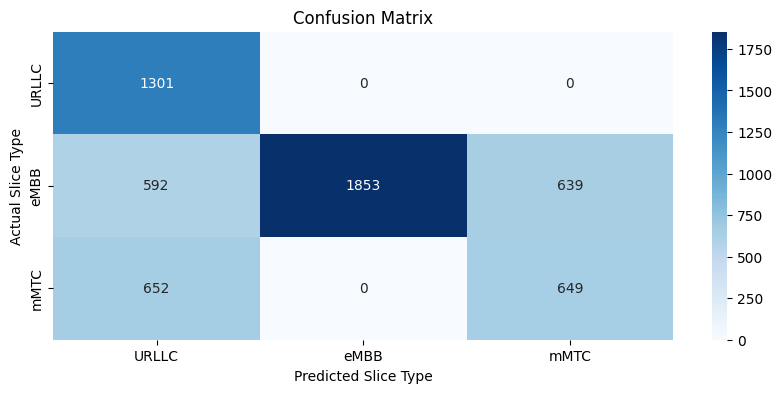


 42 42 42


In [150]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
print("\n", a, b, c)

In [151]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.6688357368976433
Precision 0.7746429161176216
Recall 0.6688357368976433
F1-score 0.6766578781141462


In [ ]:
conf_matrix = cm
conf_matrix

array([[570,  79,  82],
       [  0, 763,   0],
       [  0,   0, 724]])

In [ ]:
# # True Positives (TP) for each class
# TP_class0 = conf_matrix[0, 0]
# TP_class1 = conf_matrix[1, 1]
# TP_class2 = conf_matrix[2, 2]

# # False Positives (FP) for each class
# FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
# FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
# FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# # False Negatives (FN) for each class
# FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
# FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
# FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# # True Negatives (TN) for each class
# TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
# TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
# TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# # Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
# TP = TP_class0 + TP_class1 + TP_class2
# FP = FP_class0 + FP_class1 + FP_class2
# FN = FN_class0 + FN_class1 + FN_class2
# TN = TN_class0 + TN_class1 + TN_class2

# # Display the values
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [ ]:
# acc = (TP + TN)/(TP + TN + FP + FN)
# pres = TP/(TP + FP)
# rec = TP/(TP + FN)
# f1 = 2 * ((pres * rec)/(pres + rec))
# print("Accuracy", acc)
# print("Precision", pres)
# print("Recall", rec)
# print("F1-score", f1)

### **Confusion Matrix using Mathematical Equation**

In [ ]:
actual_label

0       3
1       3
2       2
3       2
4       1
       ..
2213    2
2214    2
2215    1
2216    2
2217    3
Name: actual_label, Length: 2218, dtype: int64

In [ ]:
predicted_label

0       3
1       3
2       2
3       2
4       1
       ..
2213    2
2214    2
2215    1
2216    2
2217    3
Name: predicted_label, Length: 2218, dtype: int32

In [ ]:
# Initialize counts for TP, FP, FN, and TN for each class
TP_class = [0, 0, 0]
FP_class = [0, 0, 0]
FN_class = [0, 0, 0]
TN_class = [0, 0, 0]

# Iterate over each sample
for actual, predicted in zip(actual_label, predicted_label):
    # Iterate over each class
    for c in range(len(np.unique(actual_label))):
        # Increment counts based on the classification result
        if actual == c+1 and predicted == c+1:  # True Positives
            TP_class[c] += 1
        elif actual == c+1 and predicted != c+1:  # False Negatives
            FN_class[c] += 1
        elif actual != c+1 and predicted == c+1:  # False Positives
            FP_class[c] += 1
        elif actual != c+1 and predicted != c+1:  # True Negatives
            TN_class[c] += 1

# Print the results for each class
print("True Positives (TP):", TP_class)
print("False Positives (FP):", FP_class)
print("False Negatives (FN):", FN_class)
print("True Negatives (TN):", TN_class)
print("\n")

# Print the results for each class and overall
for c in range(len(np.unique(actual_label))):
    print(f"Class {c+1}:")
    print("True Positives (TP):", TP_class[c])
    print("False Positives (FP):", FP_class[c])
    print("False Negatives (FN):", FN_class[c])
    print("True Negatives (TN):", TN_class[c])
    print("\n")

# Compute overall TP, FP, FN, TN
TP = sum(TP_class)
FP = sum(FP_class)
FN = sum(FN_class)
TN = sum(TN_class)

# Print the overall results
print("Overall:")
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): [570, 763, 724]
False Positives (FP): [0, 79, 82]
False Negatives (FN): [161, 0, 0]
True Negatives (TN): [1487, 1376, 1412]


Class 1:
True Positives (TP): 570
False Positives (FP): 0
False Negatives (FN): 161
True Negatives (TN): 1487


Class 2:
True Positives (TP): 763
False Positives (FP): 79
False Negatives (FN): 0
True Negatives (TN): 1376


Class 3:
True Positives (TP): 724
False Positives (FP): 82
False Negatives (FN): 0
True Negatives (TN): 1412


Overall:
True Positives (TP): 2057
False Positives (FP): 161
False Negatives (FN): 161
True Negatives (TN): 4275



 Class 1:
[[ 570    0]
 [ 161 1487]] 



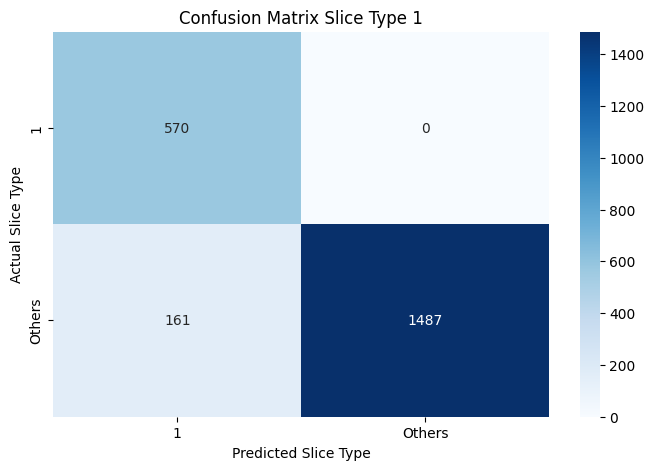


Accuracy 0.9274120829576195
Precision 1.0
Recall 0.7797537619699042
F1-score 0.8762490392006149


 Class 2:
[[ 763   79]
 [   0 1376]] 



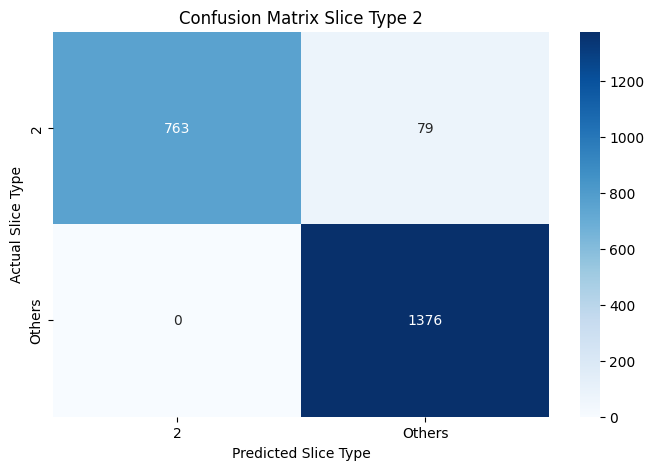


Accuracy 0.9643823264201984
Precision 0.9061757719714965
Recall 1.0
F1-score 0.950778816199377


 Class 3:
[[ 724   82]
 [   0 1412]] 



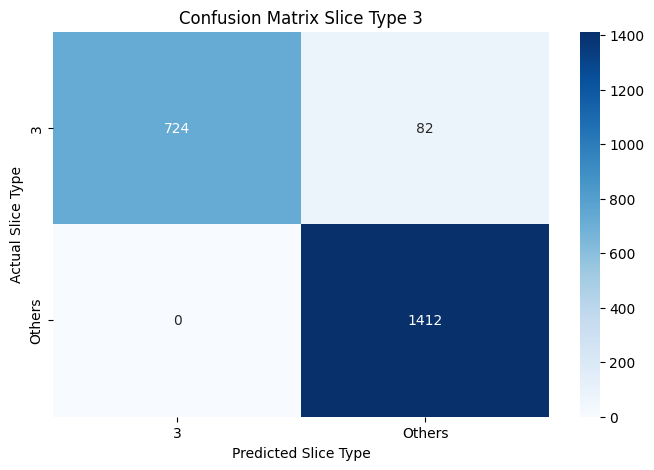


Accuracy 0.9630297565374211
Precision 0.8982630272952854
Recall 1.0
F1-score 0.9464052287581699



In [ ]:
# Create the confusion matrix array for each class
for c in range(len(np.unique(actual_label))):
    print("\n", f"Class {c+1}:")
    conf_matrix = np.array([
        [TP_class[c], FP_class[c]],
         [FN_class[c], TN_class[c]]
        ])
    print(conf_matrix, "\n")

    # Set labels for the current class
    if c == 0:
        current_class_label = '1'
    elif c == 1:
        current_class_label = '2'
    elif c == 2:
        current_class_label = '3'
    else:
        current_class_label = 'Others'

    # Confusion Matrix
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[current_class_label, 'Others'], yticklabels=[current_class_label, 'Others'])
    plt.title(f'Confusion Matrix Slice Type {c+1}')
    plt.xlabel('Predicted Slice Type')
    plt.ylabel('Actual Slice Type')
    plt.show()
    print()
    accuracy = (TP_class[c] + TN_class[c])/(TP_class[c] + TN_class[c] + FP_class[c] + FN_class[c])
    precision = TP_class[c]/(TP_class[c] + FP_class[c])
    recall = TP_class[c]/(TP_class[c] + FN_class[c])
    f1score = 2 * ((precision * recall)/(precision + recall))
    print("Accuracy", accuracy)
    print("Precision", precision)
    print("Recall", recall)
    print("F1-score", f1score)
    print()

In [ ]:
# Overall
overall_accuracy = (TP + TN)/(TP + TN + FP + FN)
overall_precision = TP/(TP + FP)
overall_recall = TP/(TP + FN)
overall_f1score = 2 * ((precision * recall)/(precision + recall))
print("Accuracy", overall_accuracy)
print("Precision", overall_precision)
print("Recall", overall_recall)
print("F1-score", overall_f1score)

Accuracy 0.9516080553050796
Precision 0.9274120829576195
Recall 0.9274120829576195
F1-score 0.9464052287581699


# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp9 - Slice_Identification_UnSupML_undersampling_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'